# Nuclear Binding Energy

Figure 5.1 from Chapter 5 of *Stellar Structure & Evolution* Pinsonneault & Ryden, Cambridge University Press.

Plot of nuclear binding energy for stable nuclei.  Two panels:
 * Left: binding energy per nucleon ($B/A$) versus mass number ($A$) for light stable nuclei; nuclei with $2N$ protons and $2N$ neutrons are shown as filled  squares.
 * Right: $B/A$ versus $A$ (logarithmic scale) for all stable nuclei. 

Data are from AME2020 from the Atomic Mass Data Center website (https://www-nds.iaea.org/amdc/)

In [5]:
%matplotlib inline

import os, sys, math
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, LogLocator, NullFormatter

import warnings
warnings.filterwarnings('ignore',category=UserWarning, append=True)

## Standard Plot Format

Setup the standard plotting format and make the plot.

In [6]:
plotFile = 'Fig5_1.png' 

# graphic aspect ratio = width/height

aspect = 2.2

#
# Don't change these unless you really need to (we never have)
#
# fPage is the horizontal fraction of the page occupied by the figure, default 1.0
#
# scaleFac is the LaTeX includegraphics scaling in units of \textwidth, default 1.0
#

fPage = 1.0
scaleFac = 0.85

# Text width in inches - don't change, this is defined by the print layout

textWidth = 6.0 # inches

# Graphic dimensions depending on bitmap or vector format (draft vs production)

dpi = 600
plotWidth = dpi*fPage*textWidth
plotHeight = plotWidth/aspect
axisFontSize = 10
labelFontSize = 7
lwidth = 0.5
axisPad = 5
wInches = fPage*textWidth # float(plotWidth)/float(dpi)
hInches = wInches/aspect  # float(plotHeight)/float(dpi)
    
# LaTeX is used throughout for markup of symbols, Times-Roman serif font

plt.rc('text', usetex=True)
plt.rc('font', **{'family':'serif','serif':['Times-Roman'],'weight':'bold','size':'16'})

# Font and line weight defaults for axes

matplotlib.rc('axes',linewidth=lwidth)
matplotlib.rcParams.update({'font.size':axisFontSize})

# axis and label padding

plt.rcParams['xtick.major.pad']=f'{axisPad}'
plt.rcParams['ytick.major.pad']=f'{axisPad}'
plt.rcParams['axes.labelpad'] = f'{axisPad}'

## Nuclear Data

Data are in 3 columns: A, EL, and B/A, extracted from the AME2020 full file.  Also make a dictionary of the 2N p and 2N n (aka "alpha" nuclei) for later highlighting.

In [7]:
dataFile = 'AME2020.txt'

data = pd.read_csv(dataFile,sep=r'\s+',comment='#')
A = np.array(data['A'])
elem = np.array(data['EL'])
BA = np.array(data['B_A'])

# The 2Np and 2Nn nuclei

A2N = {4:'He',12:'C',16:'O',20:'Ne',24:'Mg',28:'Si',32:'S',36:'Ar',40:'Ca'}

## Figure 5.1

Left panel: plot of B/A vs A on a linear-linear scale, only the first 45 nuclei, with the 2N proton and 2N neutron nuclei plotted as blue squares and labeled (the "alpha elements").

Right panel: plot of B/A vs A for all stable nuclei, with A on the log axis.

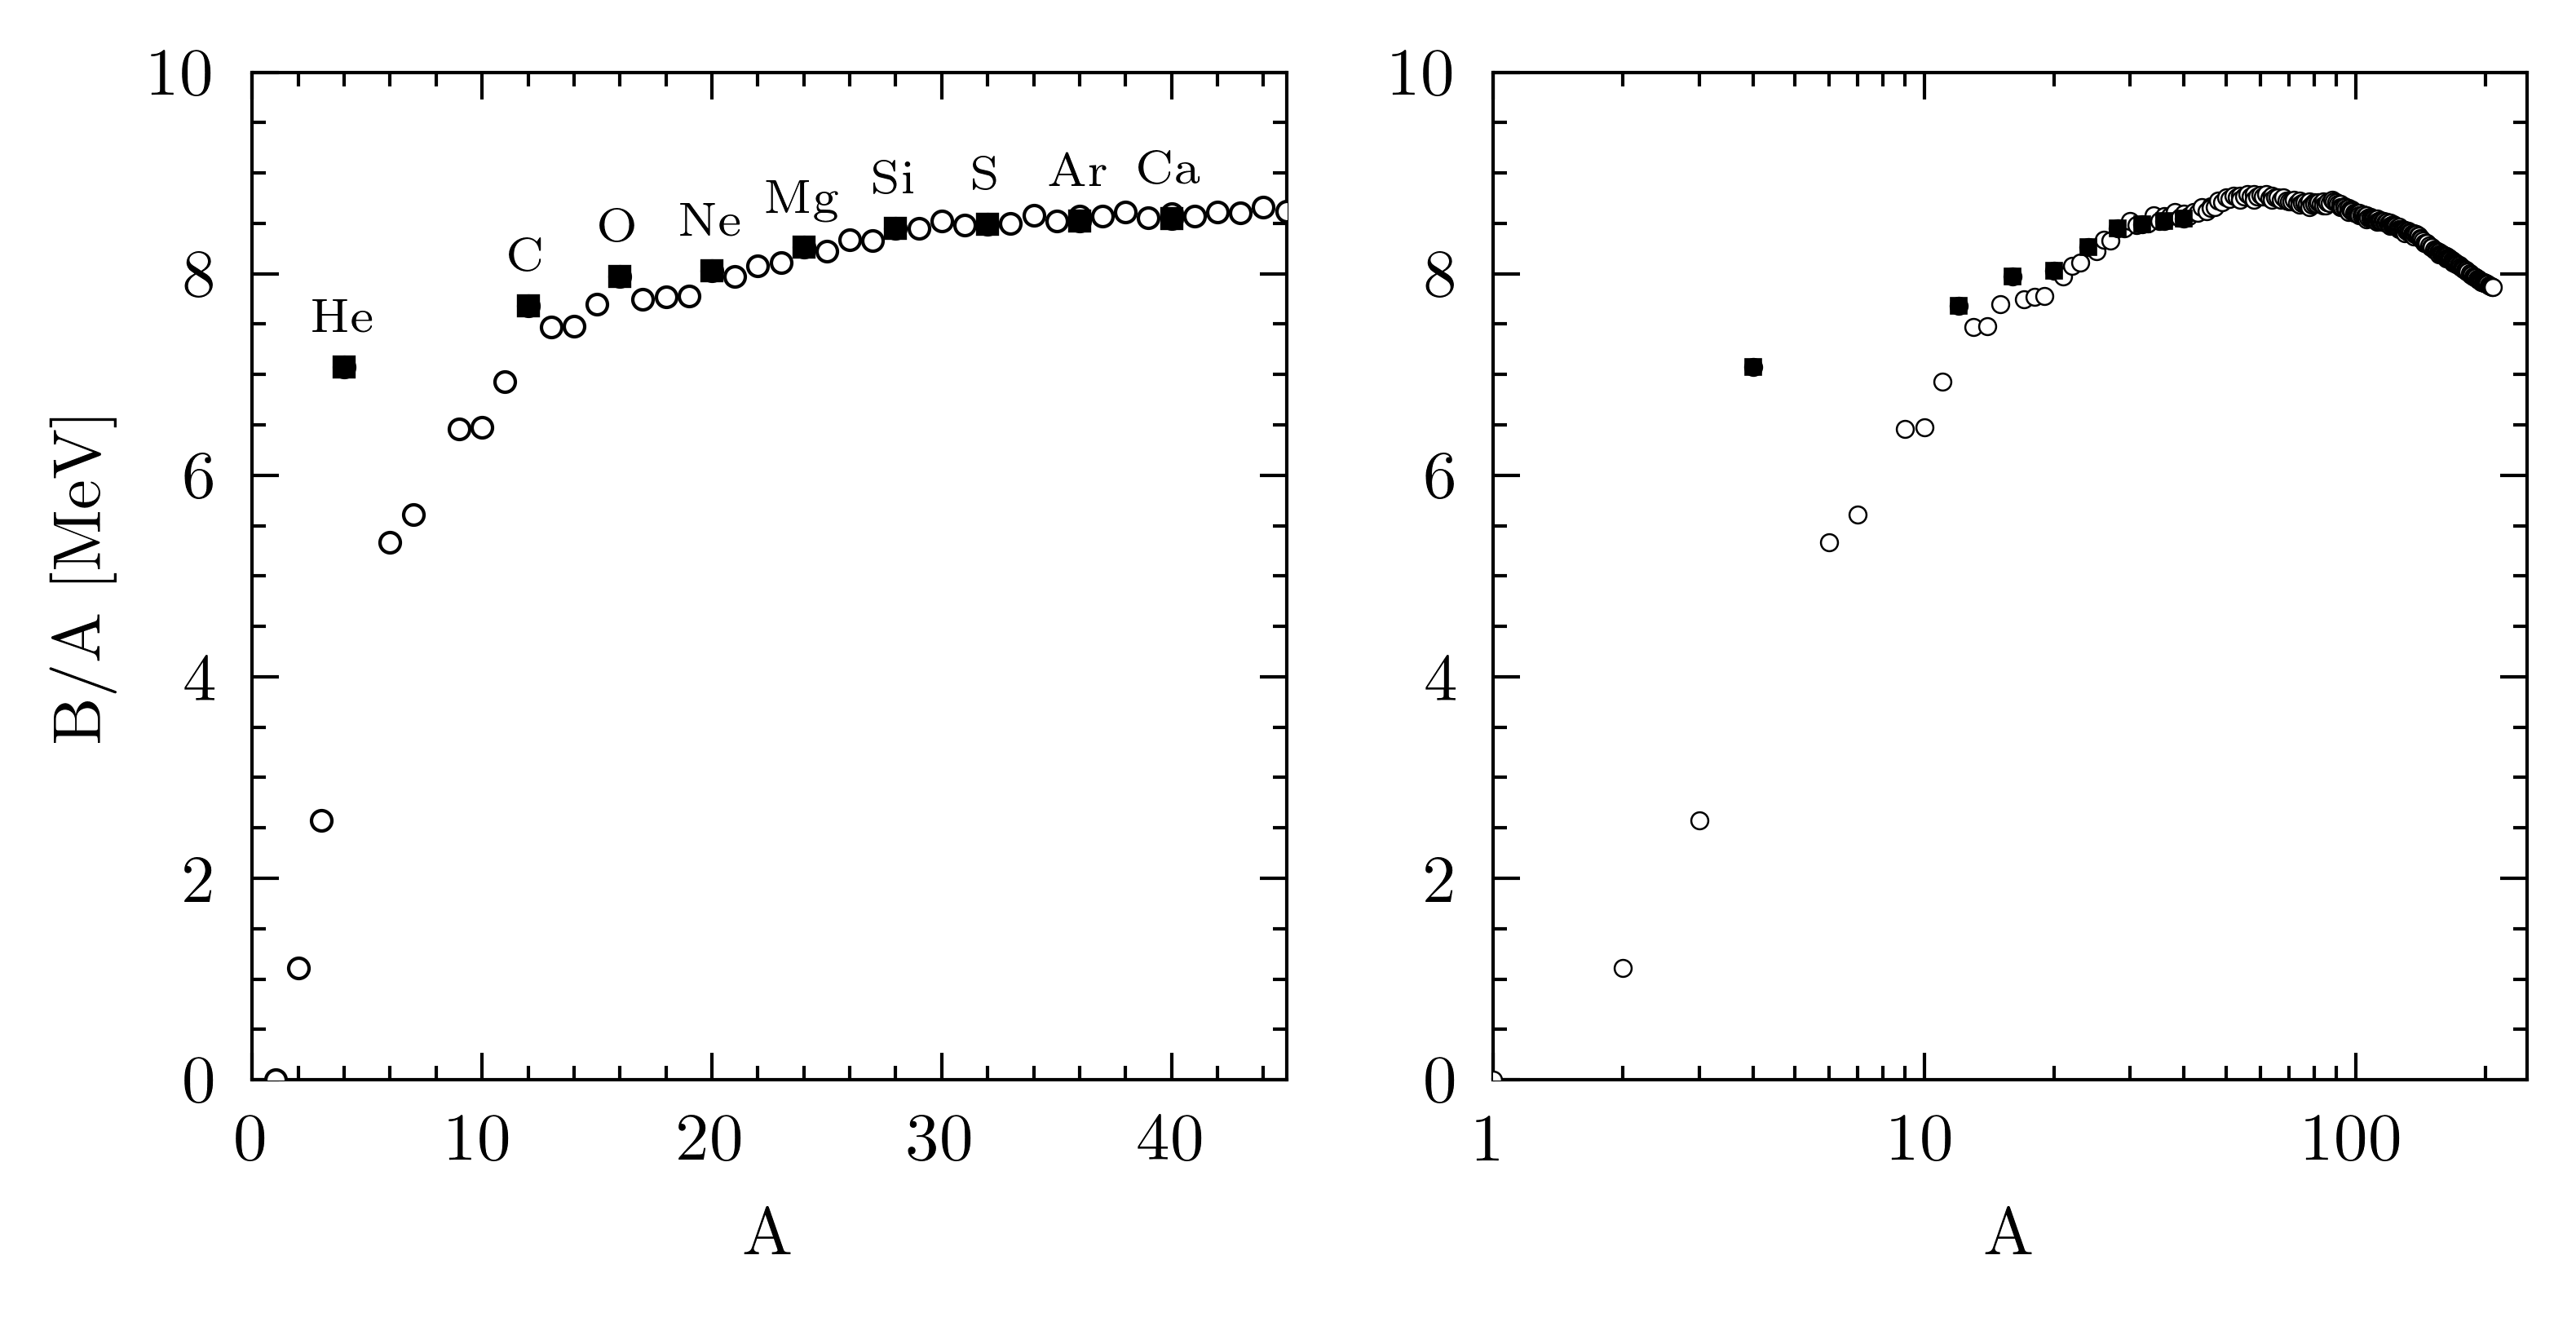

In [8]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(wInches,hInches),dpi=dpi)

fig.subplots_adjust(wspace=0.2, hspace=0)

# Left Panel: B/A vs A, linear, restricted range of A

minA = 0
maxA = 45
minBA = 0
maxBA = 10

ax1.tick_params('both',length=4,width=lwidth,which='major',direction='in',top='on',right='on')
ax1.tick_params('both',length=2,width=lwidth,which='minor',direction='in',top='on',right='on')
ax1.set_xlim(minA,maxA)
ax1.set_xlabel(r'A',fontsize=axisFontSize)
ax1.xaxis.set_major_locator(MultipleLocator(10))
ax1.xaxis.set_minor_locator(MultipleLocator(2))
ax1.set_ylim(minBA,maxBA)
ax1.set_ylabel(r'B/A [MeV]')
ax1.yaxis.set_major_locator(MultipleLocator(2))
ax1.yaxis.set_minor_locator(MultipleLocator(0.5))

# Plot all B/A vs A in this A range as circles

ax1.plot(A,BA,'o',mfc='white',mec='black',mew=0.5,markersize=3,zorder=8)

# plot B/A vs A for the alpha nuclei and label them

for i in range(len(A)):
    if int(A[i]) in A2N and A2N[int(A[i])] == elem[i]:
        ax1.plot(A[i],BA[i],'s',color='black',markersize=2.5,zorder=10)
        ax1.text(A[i],BA[i]+0.25,A2N[int(A[i])],color='black',ha='center',va='bottom',fontsize=labelFontSize)
        
# Right Panel: B/A vs logA for A=1..250

minA = 1.0
maxA = 250.0
minBA = 0.
maxBA = 10.

ax2.tick_params('both',length=4,width=lwidth,which='major',direction='in',top='on',right='on')
ax2.tick_params('both',length=2,width=lwidth,which='minor',direction='in',top='on',right='on')
ax2.set_xlim(minA,maxA)
ax2.set_xlabel(r'A',fontsize=axisFontSize)
ax2.set_xscale('log')
ax2.xaxis.set_major_locator(LogLocator(base=10.0,subs=(1.0,),numticks=100))
ax2.xaxis.set_minor_locator(LogLocator(base=10.0,subs=np.arange(2,10)*0.1,numticks=100))
ax2.xaxis.set_minor_formatter(NullFormatter())
ax2.set_xticks([1.,10.,100.])
ax2.set_xticklabels(['1','10','100'])
ax2.set_ylim(minBA,maxBA)
ax2.yaxis.set_major_locator(MultipleLocator(2))
ax2.yaxis.set_minor_locator(MultipleLocator(0.5))

# Plot all B/A vs A in this A range as circles

ax2.plot(A,BA,'o',mfc='white',mec='black',mew=0.3,markersize=2.5,zorder=8)

# plot B/A vs A for the alpha nuclei but don't label them in this panel

for i in range(len(A)):
    if int(A[i]) in A2N and A2N[int(A[i])] == elem[i]:
        ax2.plot(A[i],BA[i],'s',mfc='black',mec='black',mew=0.2,markersize=2.5,zorder=10)
            
# Make the plot

plt.plot()
plt.savefig(plotFile,bbox_inches='tight',facecolor='white')